In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:

planets = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [ ]:
$24000

In [ ]:
ecom_json = {
  "event_id": "evt_100033",
  "event_type": "purchase",
  "timestamp": "2025-02-11T10:22:15Z",
  "user": {
    "id": 92831,
    "segment": "returning",
    "location": {
      "country": "PL",
      "city": "Warsaw"
    }
  },
  "cart": {
    "items": [
      {
        "product_id": "P123",
        "name": "Wireless Mouse",
        "qty": 1,
        "price": 29.99
      },
      {
        "product_id": "P888",
        "name": "USB-C Cable",
        "qty": 2,
        "price": 8.49
      }
    ],
    "total": 46.97,
    "currency": "USD"
  },
  "payment": {
    "method": "card",
    "status": "success"
  }
}


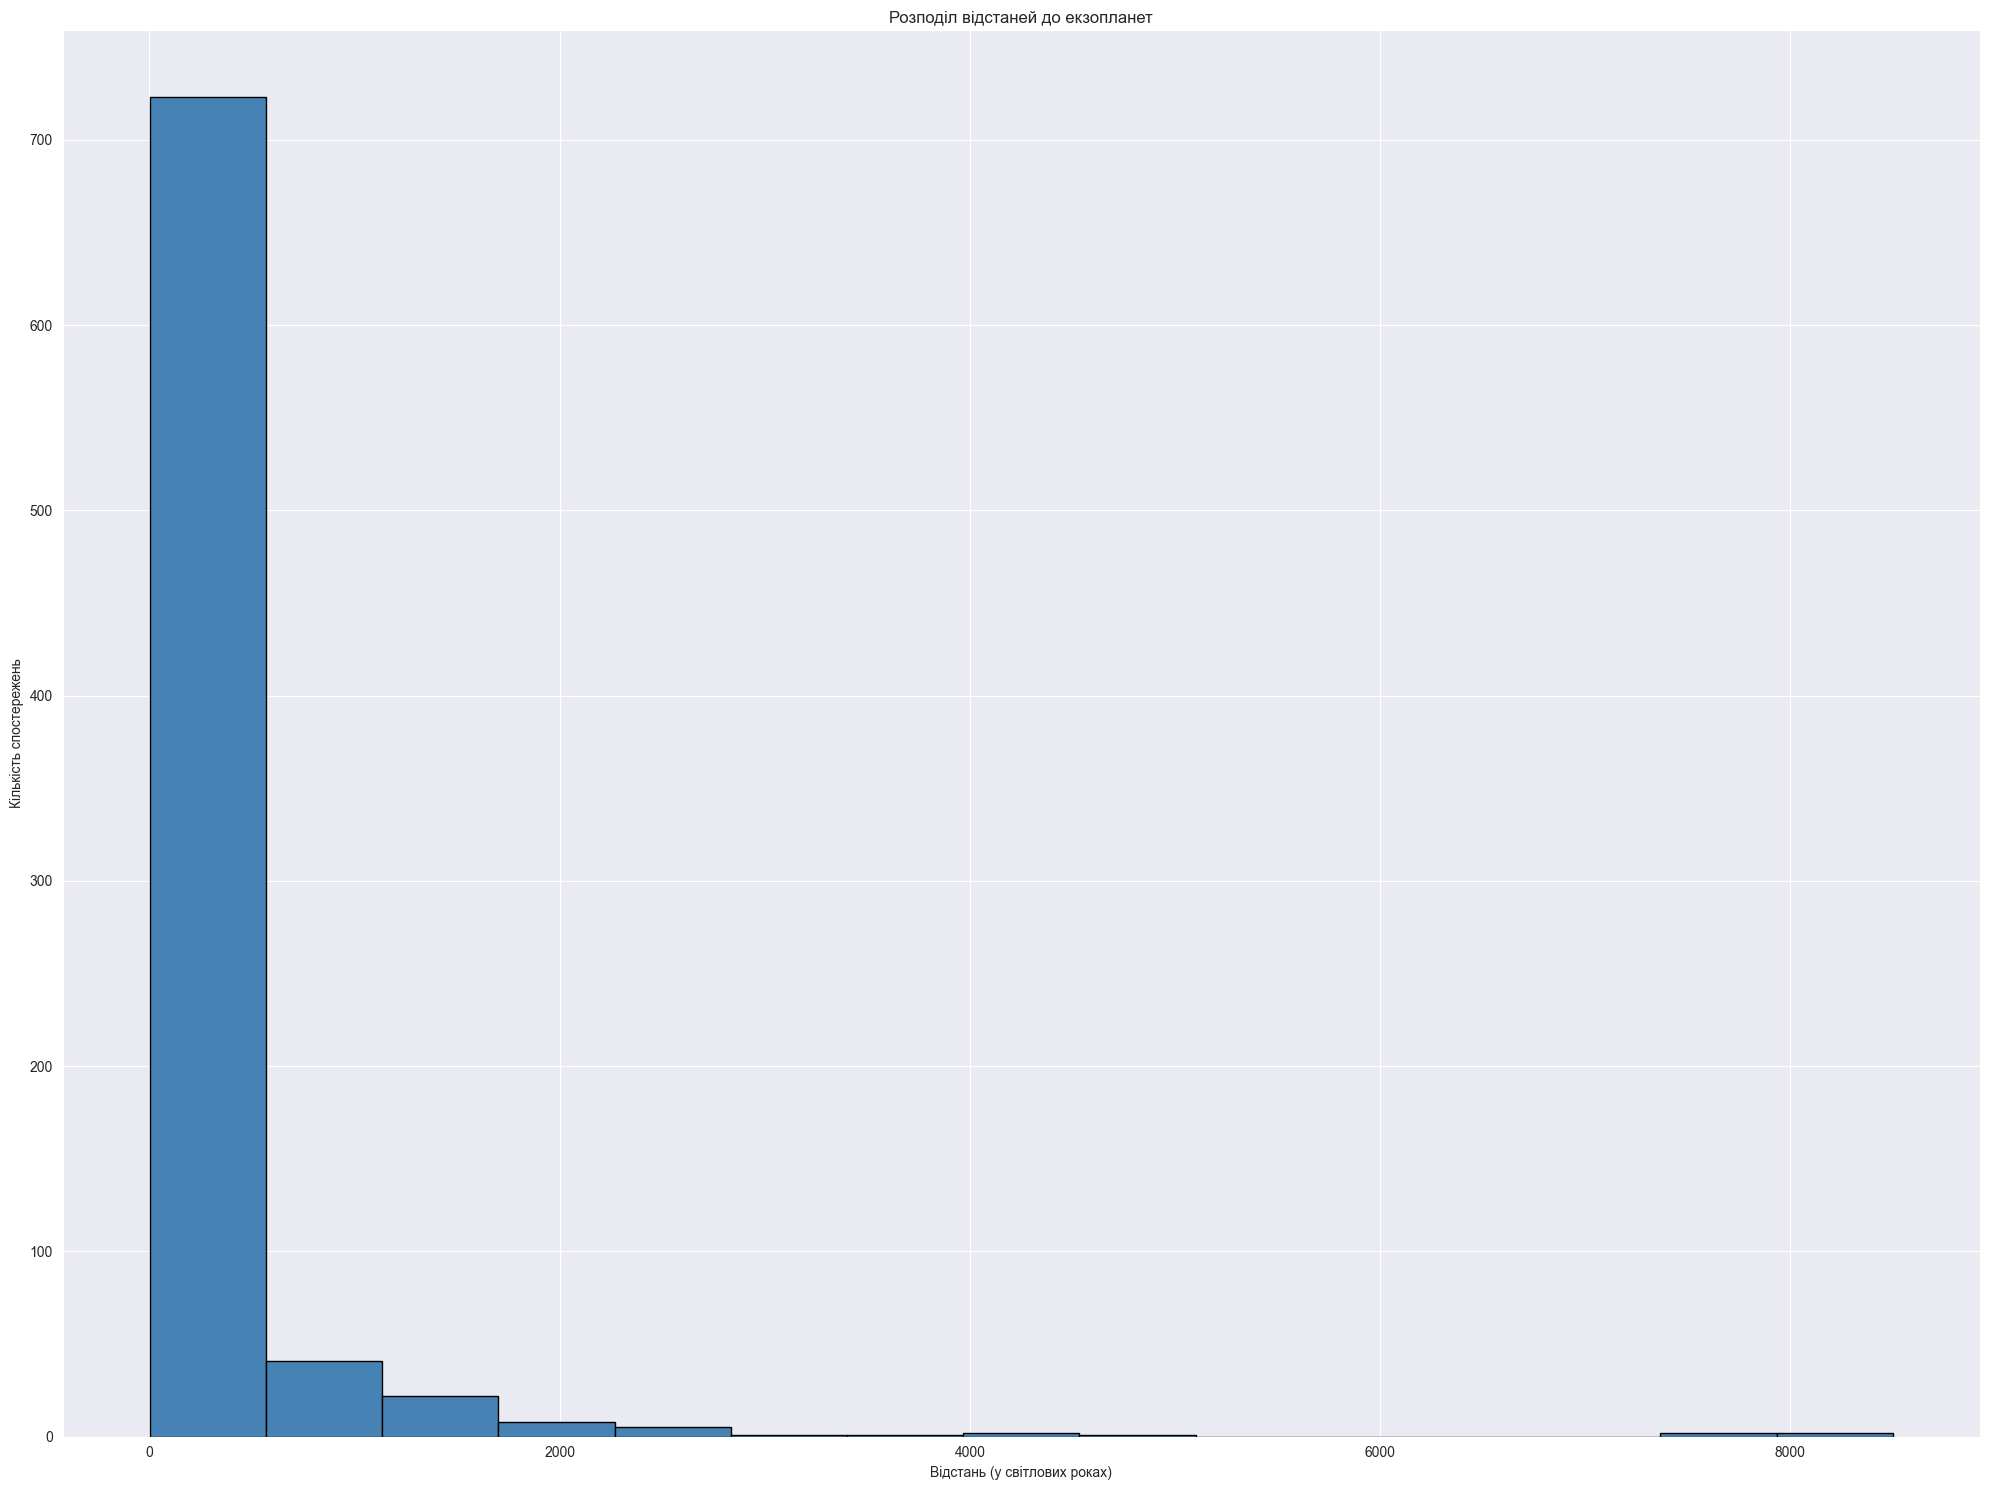

In [5]:
# Створюємо полотно для візуалізації з розміром 10x5 дюймів
plt.figure(figsize=(20, 15))

# Будуємо гістограму для змінної distance:
# - dropna() прибирає пропуски
# - bins=50 визначає кількість стовпчиків гістограми
# - color='steelblue' задає колір
# - edgecolor='black' додає чорну рамку кожному стовпчику
plt.hist(planets['distance'].dropna(), bins=15, color='steelblue', edgecolor='black')

# Додаємо заголовок до графіка
plt.title('Розподіл відстаней до екзопланет')

# Додаємо підпис осі X
plt.xlabel('Відстань (у світлових роках)')

# Додаємо підпис осі Y
plt.ylabel('Кількість спостережень')

# Вмикаємо відображення сітки на графіку для кращої читабельності
plt.grid(True)

# Автоматично налаштовуємо відступи, щоб усі підписи помістились
plt.tight_layout()

# Виводимо готовий графік на екран
plt.show()

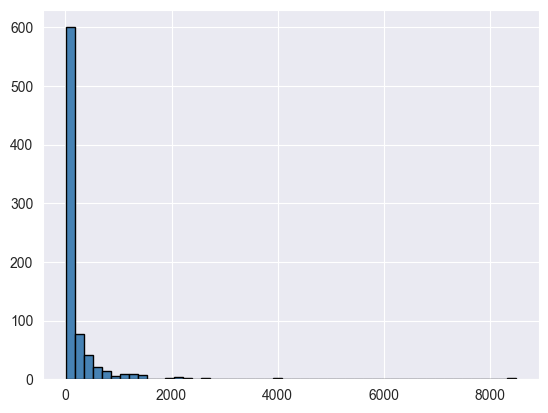

In [6]:
plt.hist(planets['distance'].dropna(), bins=50, color='steelblue', edgecolor='black')
plt.show()

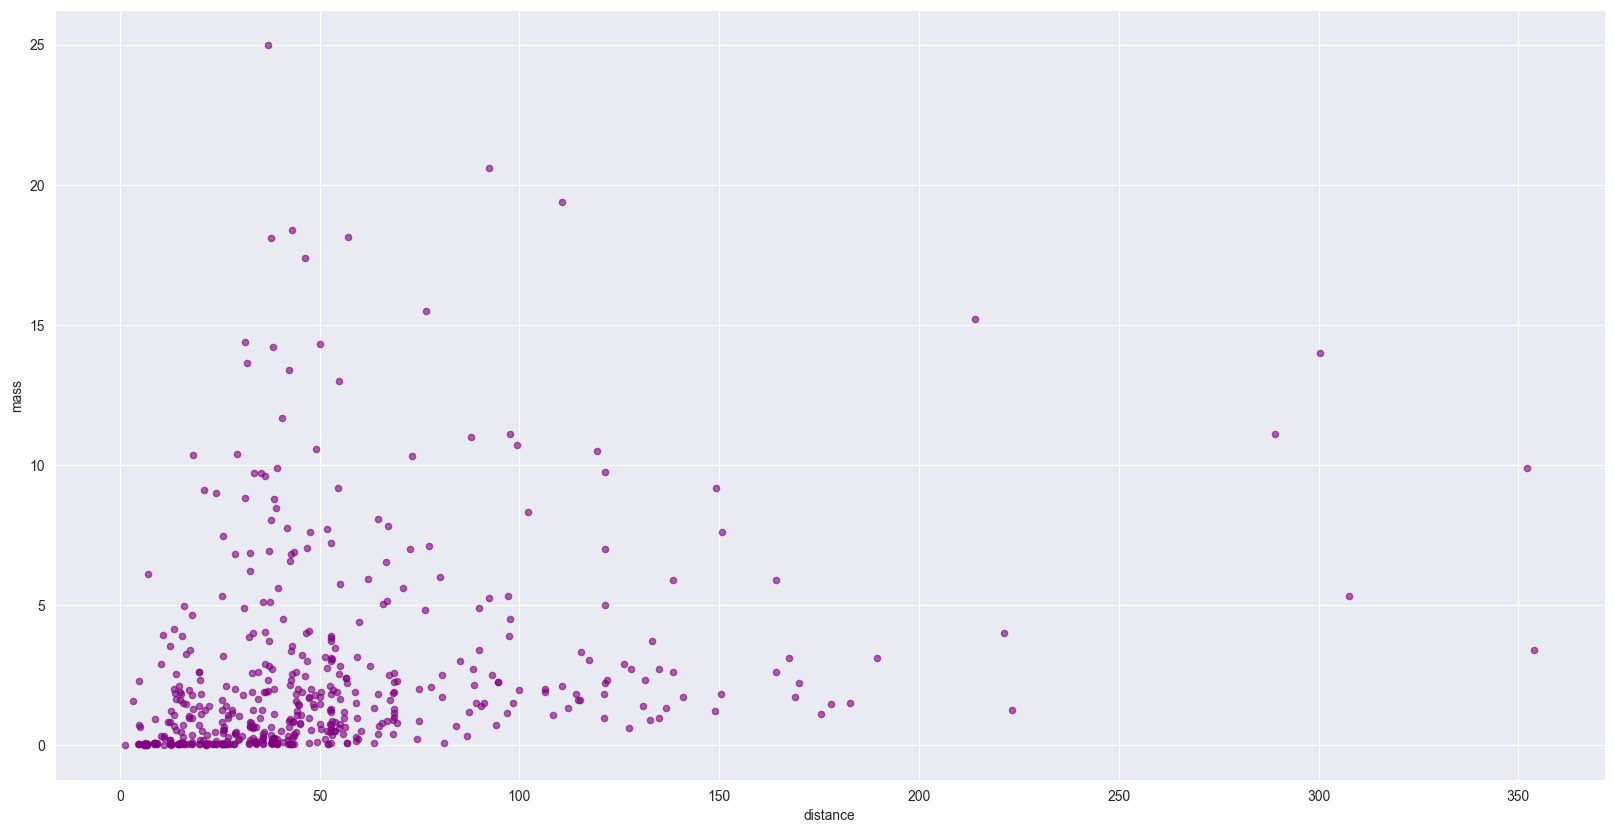

In [7]:
planets.plot(x='distance', y='mass', kind='scatter', figsize=(20, 10), color='purple', alpha=0.6)
plt.show()

<Axes: xlabel='distance', ylabel='mass'>

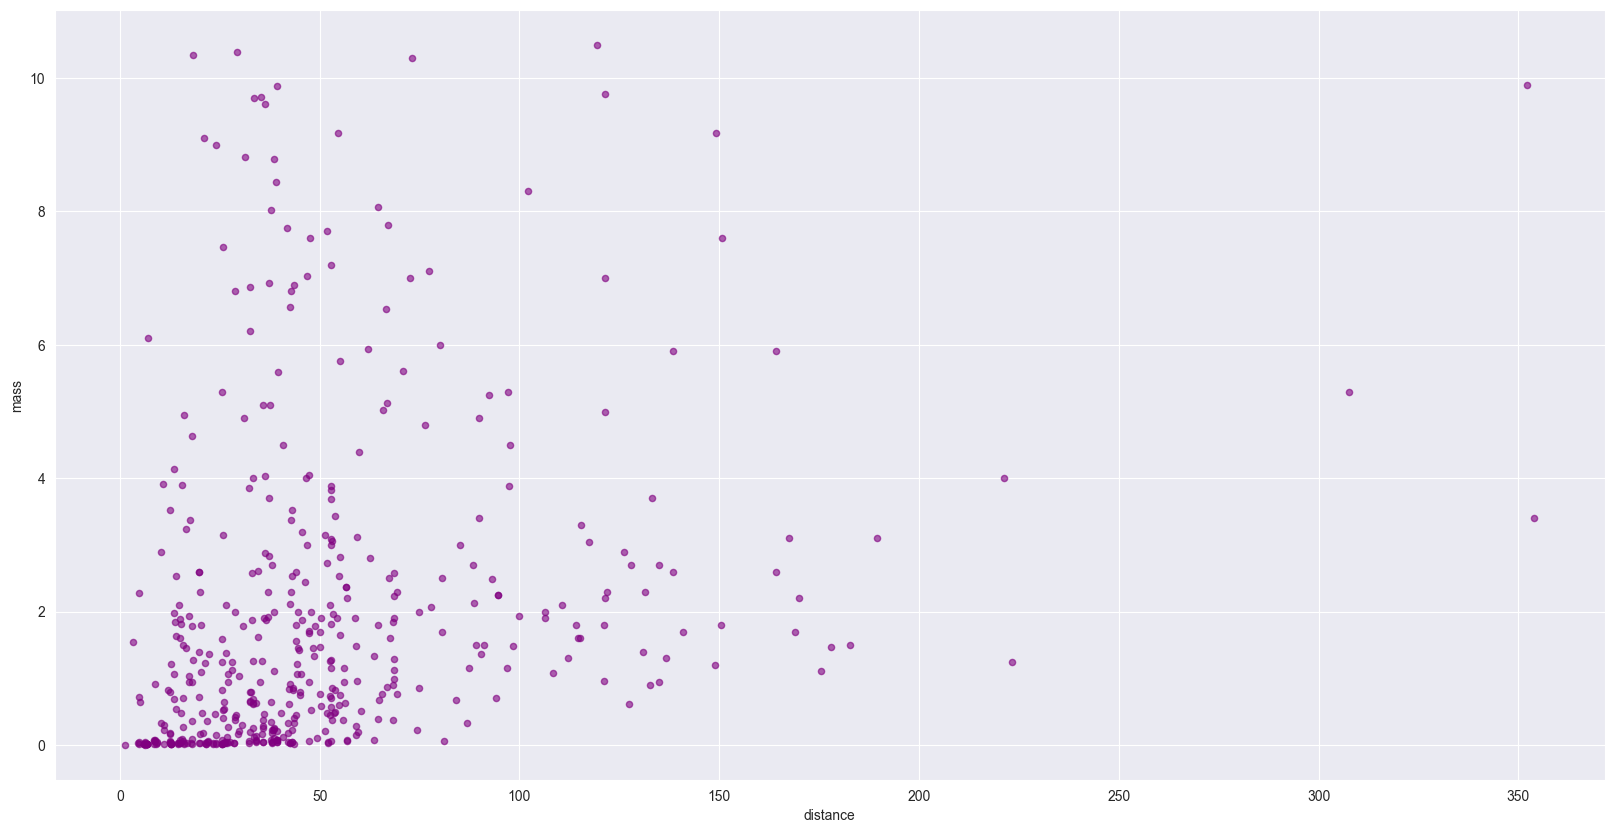

In [8]:
quantile_95 = planets['mass'].quantile(.95)
planets = planets[planets['mass'] <= quantile_95]

planets.plot(x='distance', y='mass', kind='scatter', figsize=(20, 10), color='purple', alpha=0.6)

In [9]:
discoveries_by_year = planets.groupby('year', as_index=False)['number'].sum()
discoveries_by_year['year'] = discoveries_by_year['year'].astype(int)
discoveries_by_year

,year,number
0,1995,1
1,1996,13
2,1997,1
3,1998,11
4,1999,23
5,2000,18
6,2001,14
7,2002,42
8,2003,29
9,2004,27


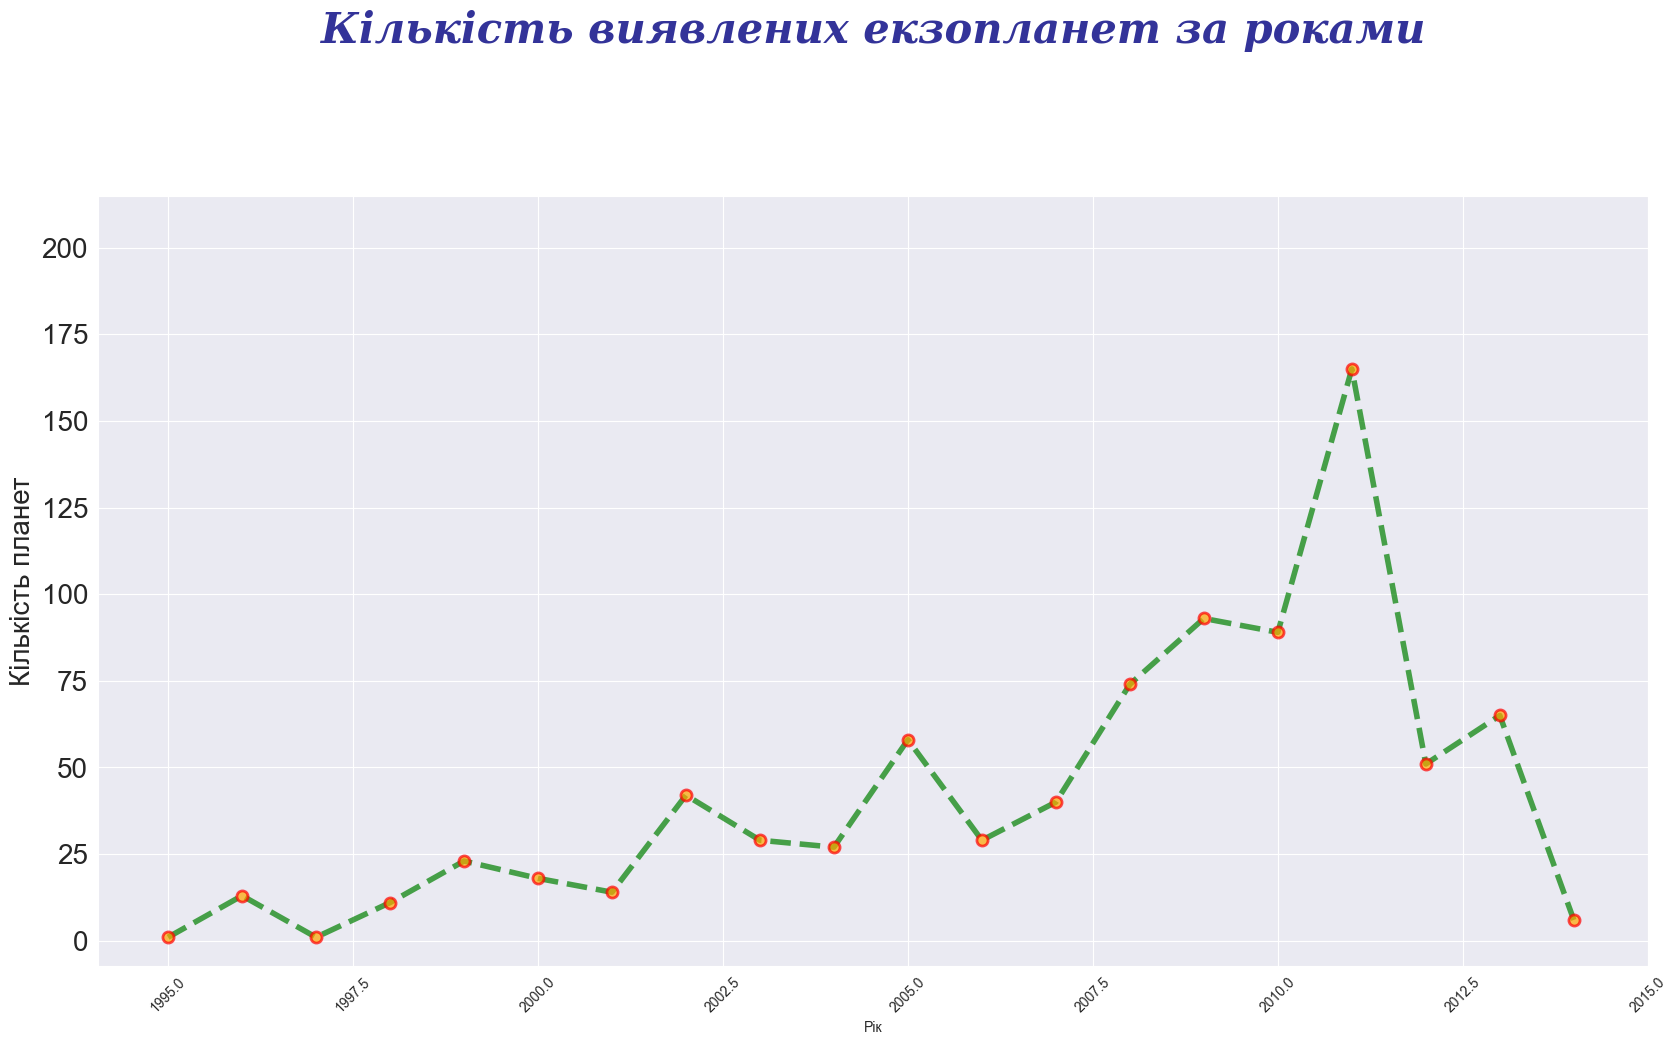

In [10]:
plt.figure(figsize=(20, 10))
plt.plot('year', 'number', data=discoveries_by_year, marker='o', color='green', linewidth=4, markersize=8, markerfacecolor='orange', markeredgewidth=2, markeredgecolor='red', linestyle='--', alpha=0.7)

plt.title('Кількість виявлених екзопланет за роками', fontsize=30, loc='center', pad=110, fontweight='bold', color='#333399', fontfamily='serif', style='italic')
plt.xlabel('Рік')
plt.ylabel('Кількість планет', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xlim(right=discoveries_by_year['year'].max()+1)
plt.ylim(top=discoveries_by_year['number'].max()+50)
plt.show()


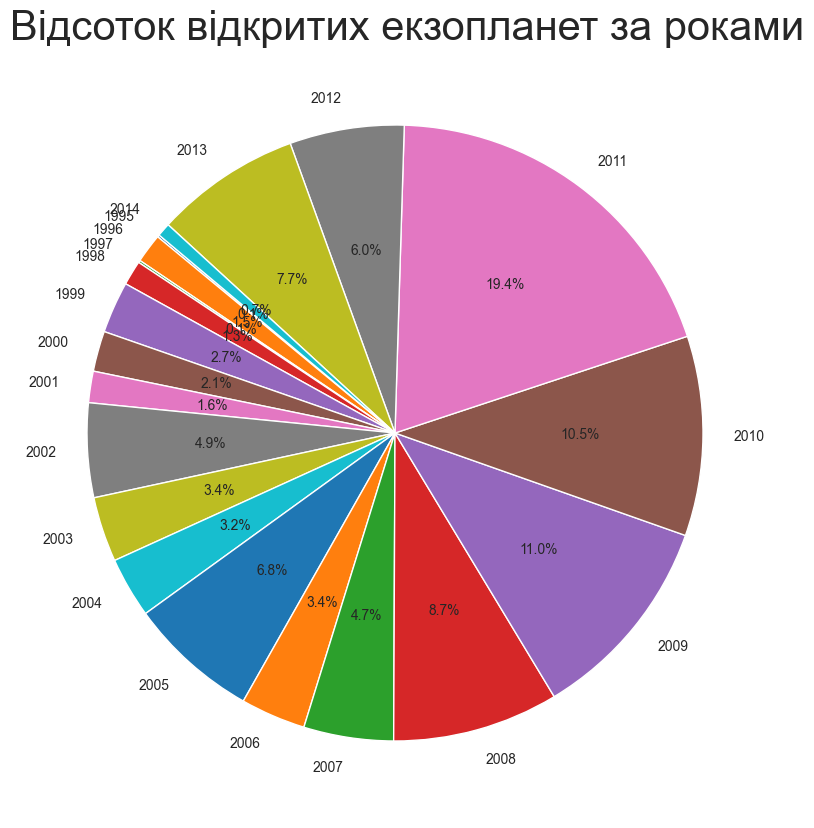

In [11]:
plt.figure(figsize=(20, 10))
plt.pie(discoveries_by_year['number'],
        labels=discoveries_by_year['year'],
        autopct='%1.1f%%',
        startangle=140)
plt.title('Відсоток відкритих екзопланет за роками', fontsize=30, loc='left')
plt.show()

In [12]:
avg_values_by_year = planets.groupby('year', as_index=False)[['mass', 'orbital_period', 'distance']].mean()
avg_values_by_year.head()

,year,mass,orbital_period,distance
0,1995,0.472000,4.230785,15.360
1,1996,1.979400,275.145383,13.920
2,1997,1.040000,39.845000,17.430
3,1998,2.687120,114.310661,26.302
4,1999,3.236643,591.477789,29.795


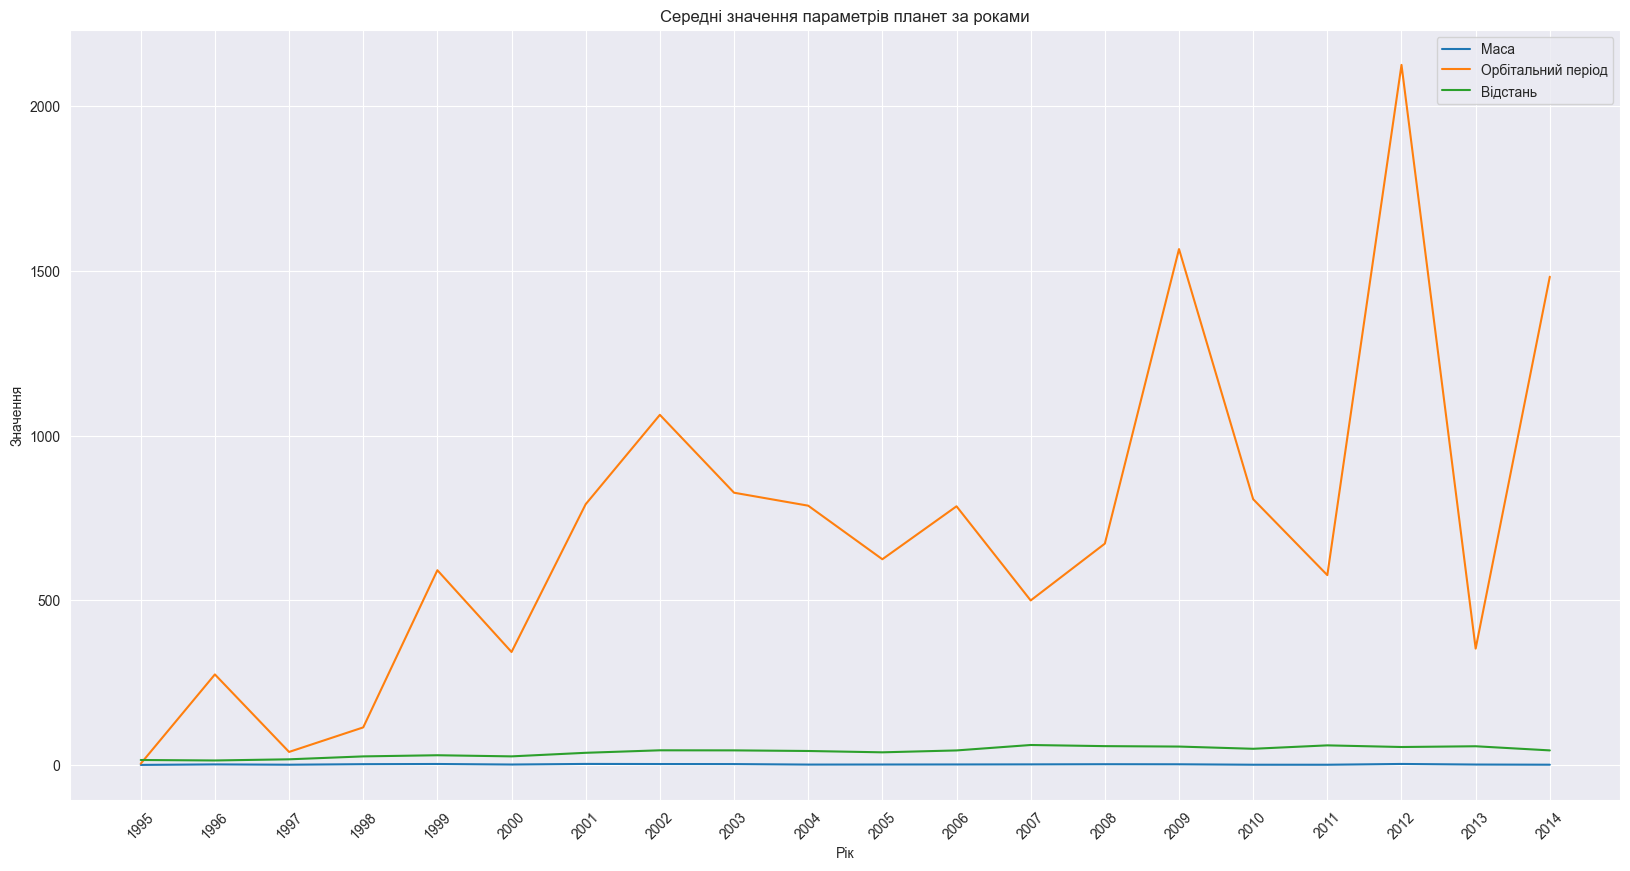

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(avg_values_by_year['year'], avg_values_by_year['mass'],
         avg_values_by_year['year'], avg_values_by_year['orbital_period'],
         avg_values_by_year['year'], avg_values_by_year['distance'])

plt.xticks(avg_values_by_year['year'].astype(int), rotation=45)
plt.legend(['Маса', 'Орбітальний період', 'Відстань'], loc='upper right')
plt.title('Середні значення параметрів планет за роками')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.grid(True)
plt.show()

In [14]:
avg_mass_by_method = planets.groupby('method', as_index=False)['mass'].mean()

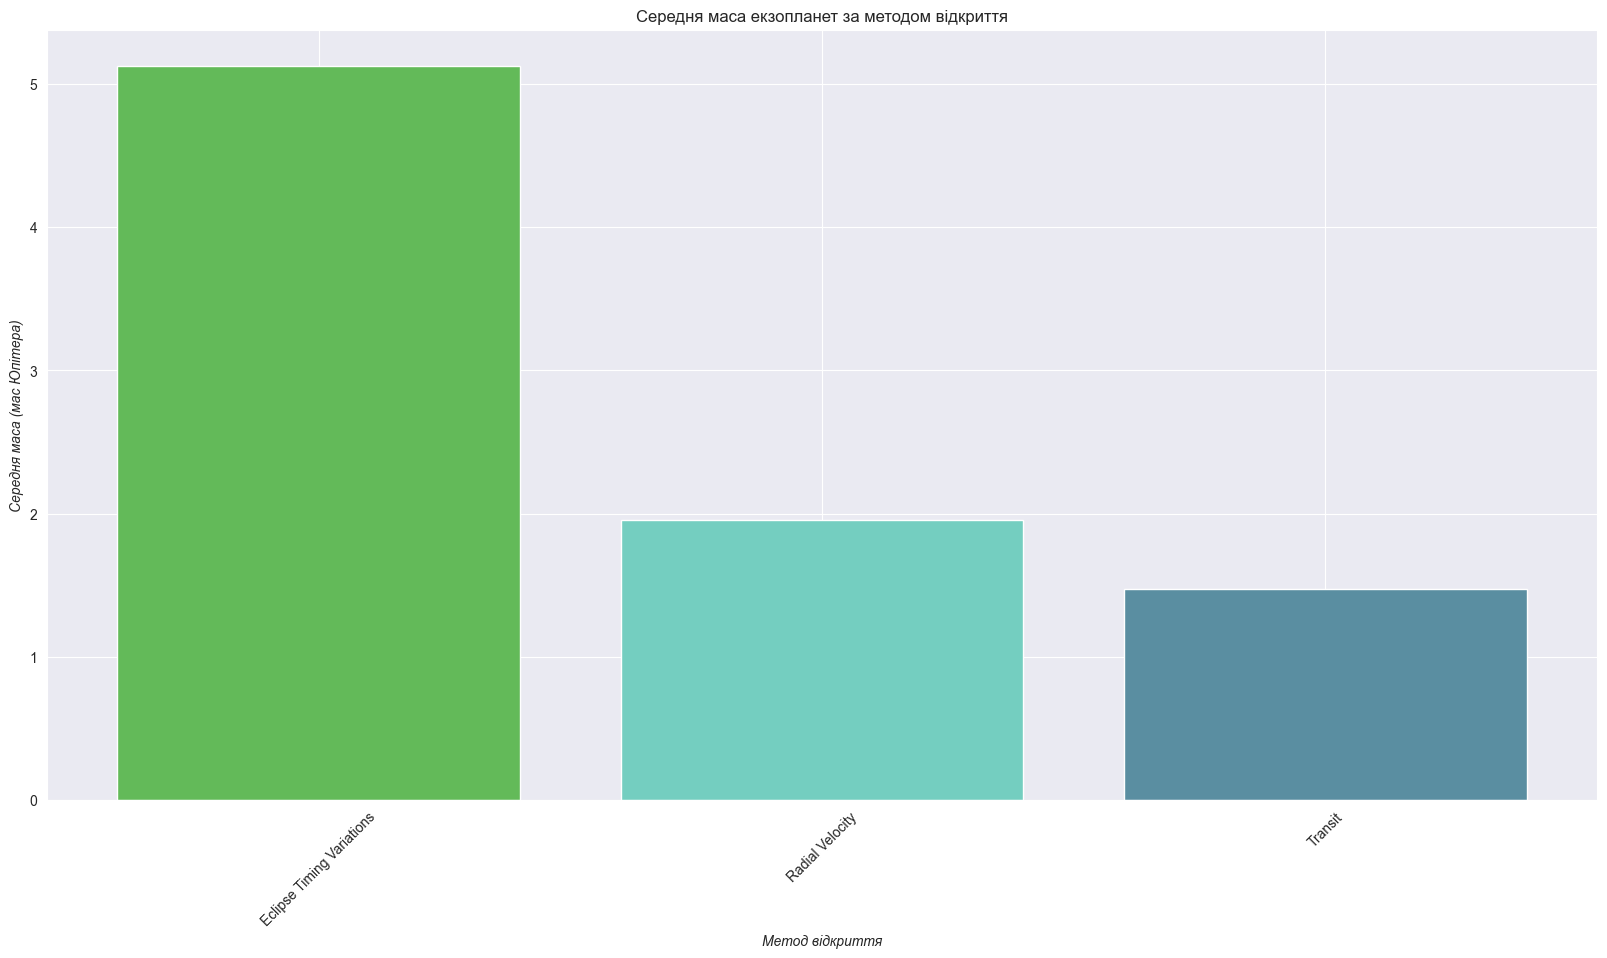

In [15]:
plt.figure(figsize=(20, 10))
plt.bar(avg_mass_by_method['method'],
        avg_mass_by_method['mass'],
        color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Середня маса екзопланет за методом відкриття')
plt.xlabel('Метод відкриття', fontstyle='italic')
plt.ylabel('Середня маса (мас Юпітера)', fontstyle='italic')
plt.xticks(rotation=45)
plt.show()

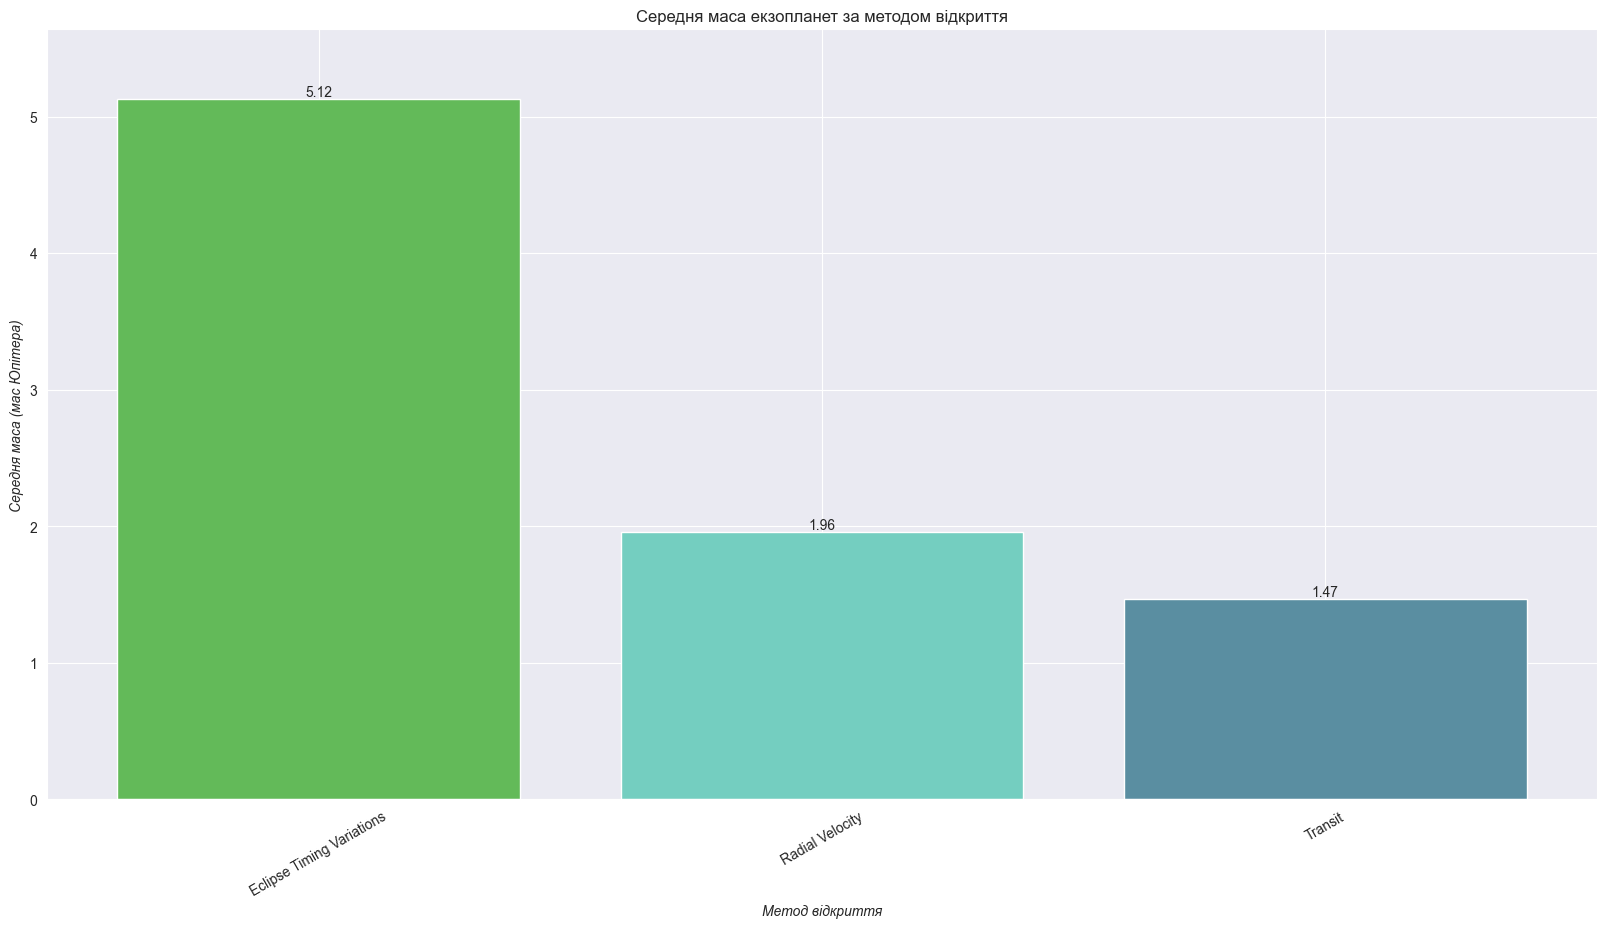

In [16]:
# додаємо простір над стовпчиками, щоб надписи були розміщені коректно
plt.figure(figsize=(20, 10))
plt.ylim(0, avg_mass_by_method['mass'].max() * 1.1)

# встановлюємо індекс для зручного доступу
avg_mass_by_method = avg_mass_by_method.set_index('method')

# визначаємо стовпчикову діаграму
plt.bar(avg_mass_by_method.index,
        avg_mass_by_method['mass'],
        color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2'])

plt.title('Середня маса екзопланет за методом відкриття')
plt.xlabel('Метод відкриття', fontstyle='italic')
plt.ylabel('Середня маса (мас Юпітера)', fontstyle='italic')
plt.xticks(rotation=30)

# додаємо підписи
for method in avg_mass_by_method.index:
    value = avg_mass_by_method.loc[method, 'mass']
    plt.text(method,
             value,
             str(round(value, 2)),
             ha='center',
             va='bottom')

plt.show()

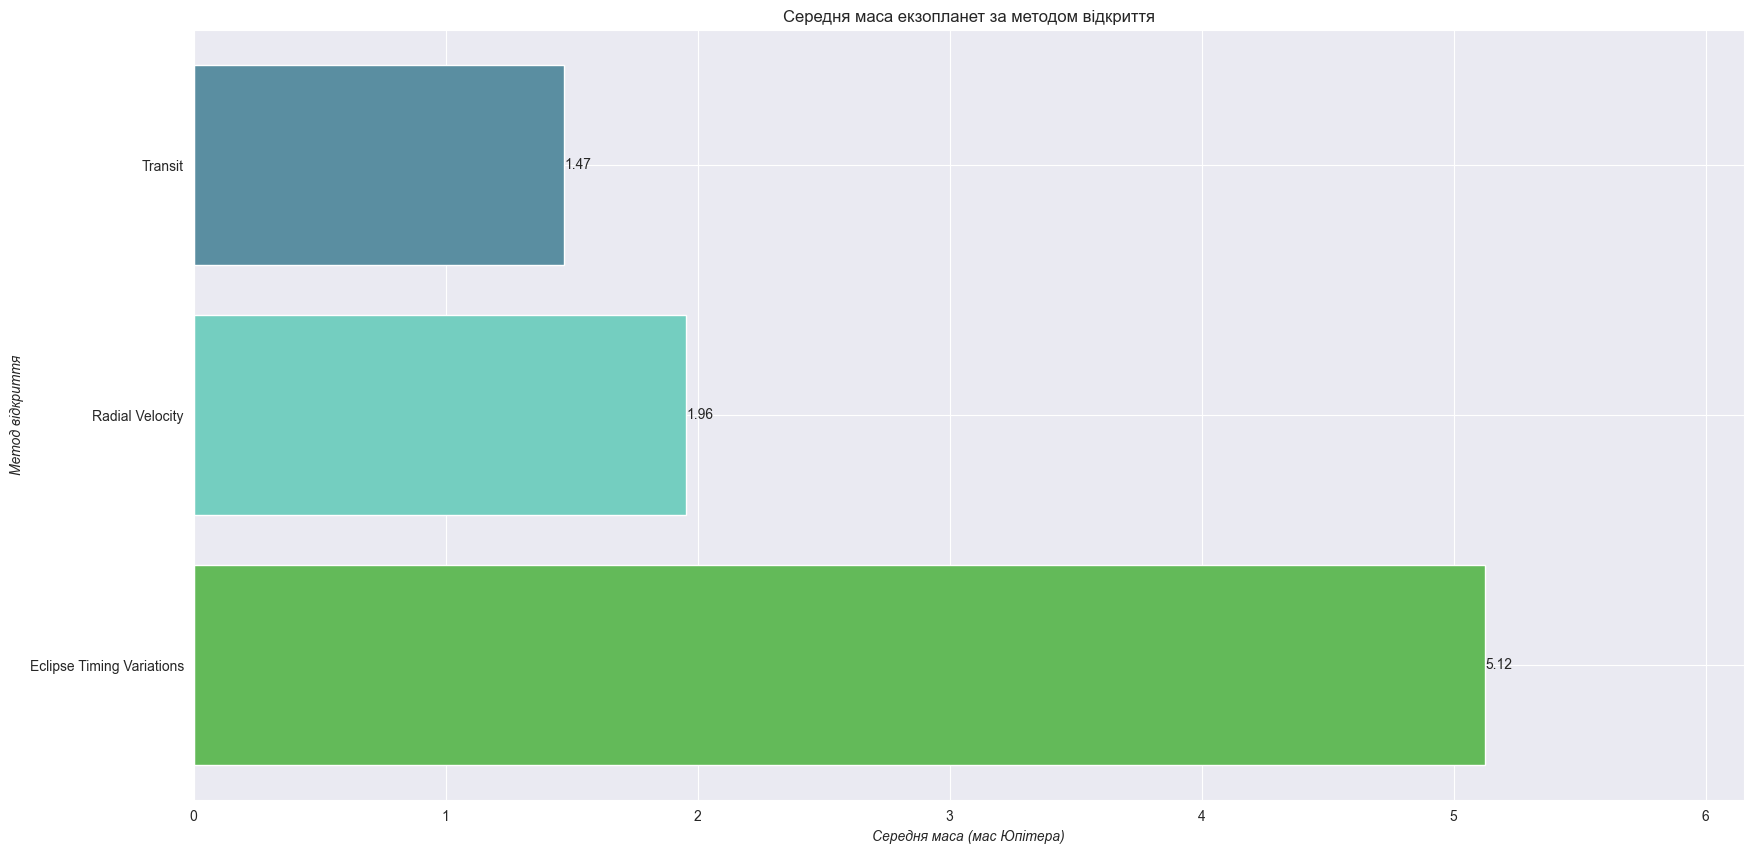

In [17]:
plt.figure(figsize=(20, 10))
plt.barh(avg_mass_by_method.index, # Y-координати (назви методів)
         avg_mass_by_method['mass'], # X-координати (довжина стовпчиків)
         color=['#63ba59', '#74cec0', '#5a8ea1', '#9199a2']) # Кольори кожного стовпчика

plt.title('Середня маса екзопланет за методом відкриття') # Підпис горизонтальної осі
plt.xlabel('Середня маса (мас Юпітера)', fontstyle='italic') # Підпис вертикальної осі
plt.ylabel('Метод відкриття', fontstyle='italic') # Межі X-осі: від 0 до макс+20%
plt.xlim(0, avg_mass_by_method['mass'].max() * 1.2)

# Цикл для додавання підписів з точними значеннями
for method in avg_mass_by_method.index: # Перебираємо кожен метод
    value = avg_mass_by_method.loc[method, 'mass'] # Беремо значення маси для цього методу
    plt.text(value, # X-координата тексту (кінець стовпчика)
             method, # Y-координата тексту (назва методу)
             str(round(value, 2)), # Сам текст (округлене до 2 знаків)
             ha='left', # Горизонтальне вирівнювання: зліва від точки
             va='center') # Вертикальне вирівнювання: по центру

plt.show()

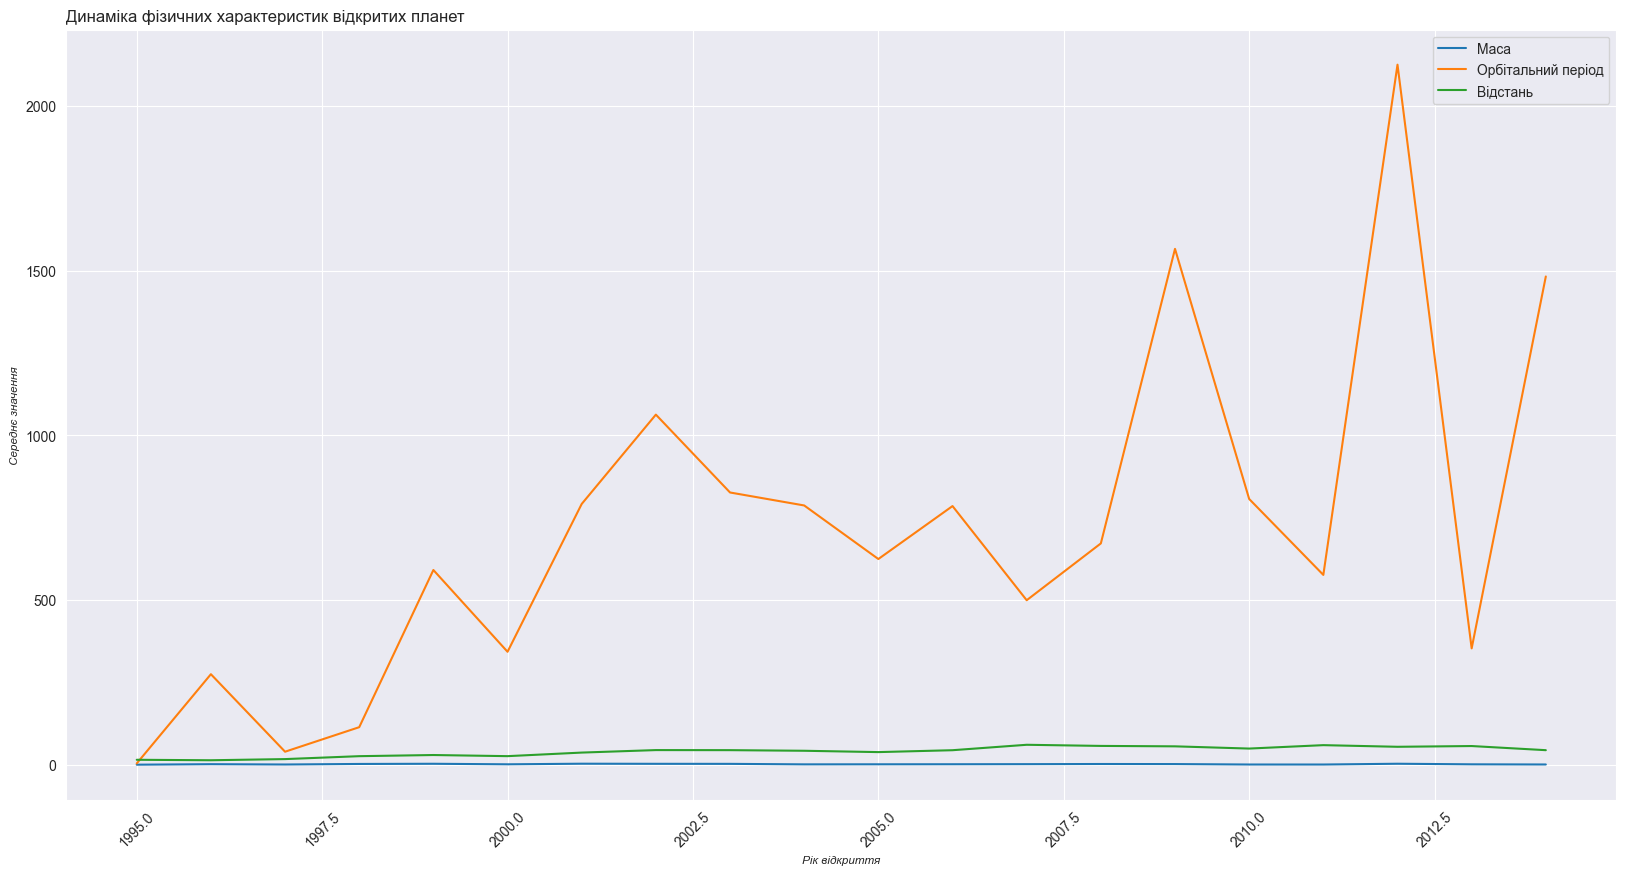

In [18]:
# Створення графіку з трьома лініями одночасно
plt.figure(figsize=(20, 10))
plt.plot(avg_values_by_year['year'], avg_values_by_year[['mass', 'orbital_period', 'distance']])

# Поворот років на 45° для читабельності
plt.xticks(rotation=45)

# Підписи осей малим курсивним шрифтом
plt.xlabel('Рік відкриття', fontsize='small', fontstyle='italic')
plt.ylabel('Середнє значення', fontsize='small', fontstyle='italic')

# Заголовок великим шрифтом ліворуч
plt.title('Динаміка фізичних характеристик відкритих планет', fontsize='large', loc='left')

# Легенда у верхньому правому куті
plt.legend(['Маса', 'Орбітальний період', 'Відстань'], loc='upper right')

# Відображення готового графіку
plt.show()

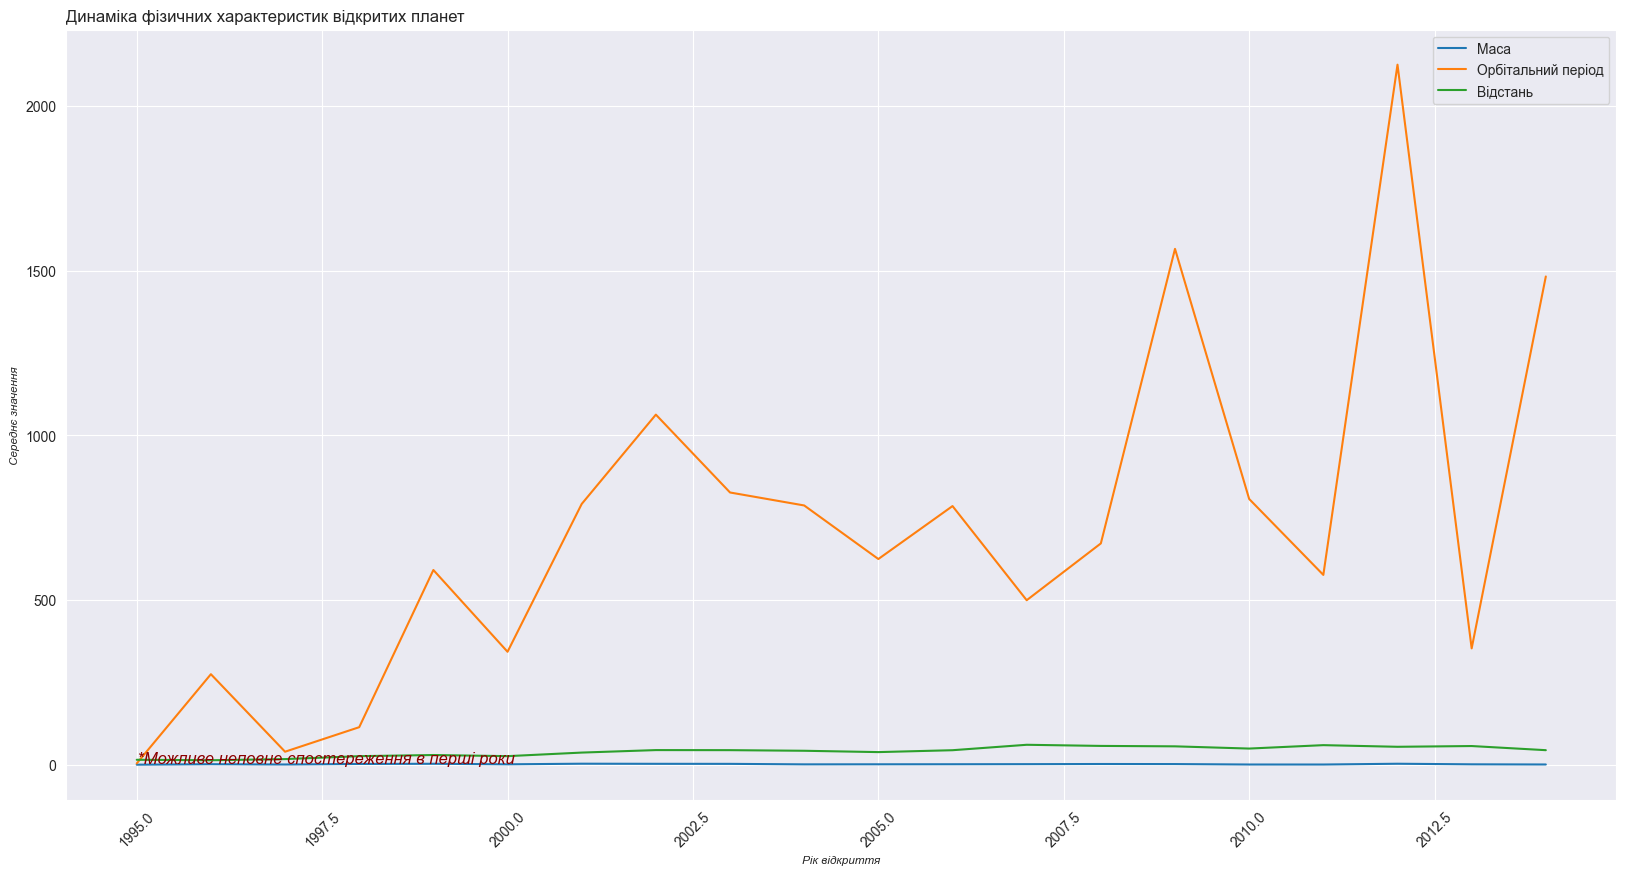

In [19]:
# Створення графіку з трьома лініями одночасно
plt.figure(figsize=(20, 10))
plt.plot(avg_values_by_year['year'], avg_values_by_year[['mass', 'orbital_period', 'distance']])

# Поворот років на 45° щоб не накладалися
plt.xticks(rotation=45)

# Підписи осей малим курсивним шрифтом
plt.xlabel('Рік відкриття', fontsize='small', fontstyle='italic')
plt.ylabel('Середнє значення', fontsize='small', fontstyle='italic')

# Заголовок великим шрифтом зліва
plt.title('Динаміка фізичних характеристик відкритих планет', fontsize='large', loc='left')

# Легенда у верхньому правому куті
plt.legend(['Маса', 'Орбітальний період', 'Відстань'], loc='upper right')

# ТЕКСТОВА ПРИМІТКА у верхньому лівому куті
plt.text(
    avg_values_by_year['year'].min(), # найранішій рік (ліворуч)
    avg_values_by_year['mass'].max() * 1.05, # трохи вище максимуму маси
    '*Можливе неповне спостереження в перші роки', # текст попередження
    fontsize='large',
    fontstyle='italic',
    color='#8B0000' # малий, курсив, темно-червоний
)

plt.show()